<a href="https://colab.research.google.com/github/vpinilla001/DeepAnT/blob/master/ANN_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
%matplotlib inline

In [2]:
df = pd.read_csv("/content/art_daily_nojump.csv")
df.head()

,timestamp,value,label
0,2014-04-01 00:00:00,21.598011,0
1,2014-04-01 00:05:00,19.321392,0
2,2014-04-01 00:10:00,21.399938,0
3,2014-04-01 00:15:00,18.373916,0
4,2014-04-01 00:20:00,18.167499,0


In [3]:
df.drop(['label'], axis=1, inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index(['timestamp'], drop=True)
df.head(10)

,value
timestamp,
2014-04-01 00:00:00,21.598011
2014-04-01 00:05:00,19.321392
2014-04-01 00:10:00,21.399938
2014-04-01 00:15:00,18.373916
2014-04-01 00:20:00,18.167499
2014-04-01 00:25:00,20.016181
2014-04-01 00:30:00,18.238649
2014-04-01 00:35:00,19.569959
2014-04-01 00:40:00,21.587112


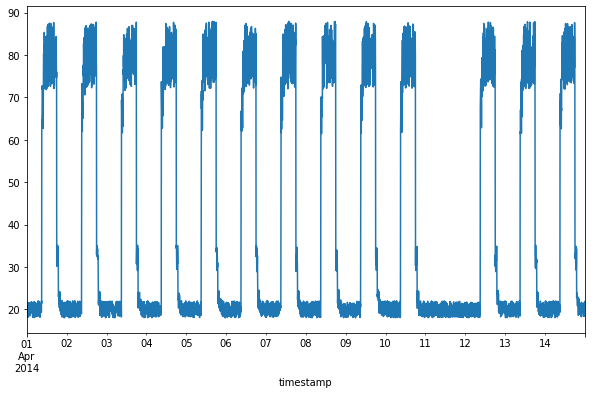

In [4]:
plt.figure(figsize=(10, 6))
df['value'].plot();

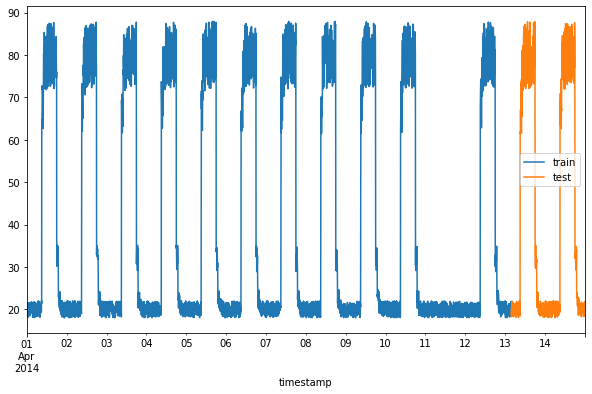

In [5]:
split_date = pd.Timestamp('2014-04-13 03:40:00')
df =  df['value']
train = df.loc[:split_date]
test = df.loc[split_date:]
plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [6]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train.values.reshape(-1,1))
test_sc = scaler.transform(test.values.reshape(-1,1))

In [7]:
predict_days = 1
X_train = train_sc[:-predict_days]
y_train = train_sc[predict_days:]

X_test = test_sc[:-predict_days]
y_test = test_sc[predict_days:]

In [8]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [9]:
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
3500/3500 [==============================] - 2s 698us/step - loss: 0.0575
Epoch 2/100
3500/3500 [==============================] - 2s 690us/step - loss: 0.0207
Epoch 3/100
3500/3500 [==============================] - 2s 693us/step - loss: 0.0205
Epoch 4/100
3500/3500 [==============================] - 2s 694us/step - loss: 0.0204
Epoch 5/100
3500/3500 [==============================] - 2s 687us/step - loss: 0.0203
Epoch 6/100
3500/3500 [==============================] - 2s 679us/step - loss: 0.0202
Epoch 7/100
3500/3500 [==============================] - 2s 688us/step - loss: 0.0201
Epoch 8/100
3500/3500 [==============================] - 2s 693us/step - loss: 0.0201
Epoch 9/100
3500/3500 [==============================] - 2s 695us/step - loss: 0.0201
Epoch 10/100
3500/3500 [==============================] - 2s 680us/step - loss: 0.0200
Epoch 11/100
3500/3500 [==============================] - 3s 724us/step - loss: 0.0200
Epoch 12/100
3500/3500 [============================

In [12]:
y_pred_test_nn = nn_model.predict(X_train)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.968


ValueError: ignored

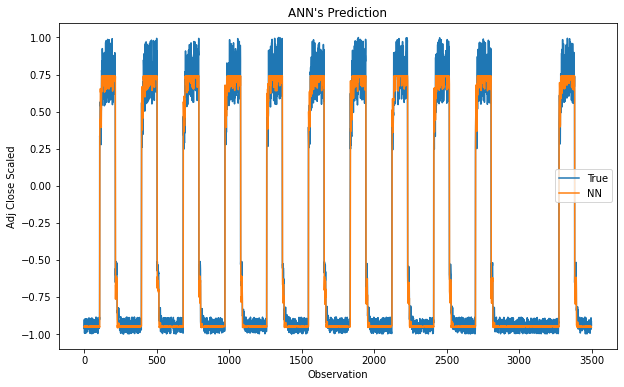

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();